In [1]:
import os
import cv2 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
rootPath = '../input/train_posture2'

In [2]:
imageGenerator = ImageDataGenerator(rescale=1./255,
                                    #rotation_range=40,
                                    #width_shift_range=0.03,
                                    #height_shift_range=0.03,
                                    #horizontal_flip=False,
                                    validation_split=.2)

In [3]:
trainGen = imageGenerator.flow_from_directory(os.path.join(rootPath,'training_set'),
                                              target_size=(64,64),
                                              color_mode="grayscale",
                                              subset='training')

validationGen = imageGenerator.flow_from_directory(os.path.join(rootPath,'training_set'),
                                                    target_size=(64,64),color_mode="grayscale",
                                                    subset='validation')

Found 7771 images belonging to 5 classes.
Found 1941 images belonging to 5 classes.


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model = Sequential()

In [5]:
model.add(layers.InputLayer(input_shape=(64,64,1)))
model.add(layers.Conv2D(16,(3,3),(1,1),'same',activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(rate=0.3))

model.add(layers.Conv2D(32, (3, 3), (1, 1), 'same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(rate=0.3))

model.add(layers.Conv2D(64, (3, 3), (1, 1), 'same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(rate=0.3))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(rate=0.3))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(rate=0.3))
model.add(layers.Dense(5, activation='softmax'))

model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________

In [6]:
from tensorflow.keras import optimizers
from keras.callbacks import EarlyStopping


opt = optimizers.Adam(lr=0.0001)

model.compile(
    optimizer=opt,
    loss='categorical_crossentropy', 
    metrics=['acc'],
)

Using TensorFlow backend.


In [7]:
epochs = 32
es = EarlyStopping(monitor='val_loss', mode='min', patience=5)

history = model.fit_generator(
    trainGen, 
    epochs=epochs,
    steps_per_epoch=trainGen.samples / epochs, 
    validation_data=validationGen,
    validation_steps=trainGen.samples / epochs,
    callbacks=[es]
)

Epoch 1/32
243/242 [==============================] - 36s 149ms/step - loss: 1.1048 - acc: 0.5541 - val_loss: 0.6623 - val_acc: 0.8109
Epoch 2/32
243/242 [==============================] - 29s 120ms/step - loss: 0.4781 - acc: 0.8362 - val_loss: 0.3252 - val_acc: 0.9281
Epoch 3/32
243/242 [==============================] - 29s 119ms/step - loss: 0.2593 - acc: 0.9134 - val_loss: 0.2021 - val_acc: 0.9370
Epoch 4/32
243/242 [==============================] - 29s 118ms/step - loss: 0.1600 - acc: 0.9478 - val_loss: 0.1356 - val_acc: 0.9624
Epoch 5/32
243/242 [==============================] - 29s 117ms/step - loss: 0.1100 - acc: 0.9636 - val_loss: 0.0897 - val_acc: 0.9793
Epoch 6/32
243/242 [==============================] - 29s 118ms/step - loss: 0.0800 - acc: 0.9753 - val_loss: 0.0648 - val_acc: 0.9830
Epoch 7/32
243/242 [==============================] - 29s 118ms/step - loss: 0.0609 - acc: 0.9815 - val_loss: 0.0509 - val_acc: 0.9871
Epoch 8/32
243/242 [==============================] - 2

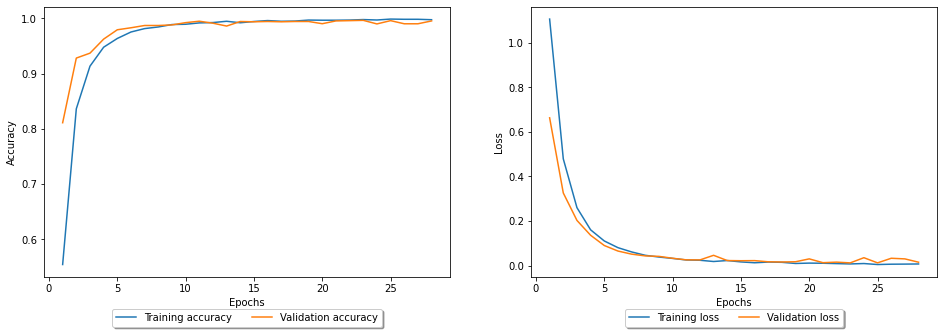

In [8]:
import matplotlib.pyplot as plt
from pylab import figure, axes, pie, title, savefig

def show_graph(history_dict):
    accuracy = history_dict['acc']
    val_accuracy = history_dict['val_acc']
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)
    
    plt.figure(figsize=(16, 2))
    
    plt.subplot(121)
    plt.subplots_adjust(top=2)
    plt.plot(epochs, accuracy, label='Training accuracy')
    plt.plot(epochs, val_accuracy, label='Validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')

    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
              fancybox=True, shadow=True, ncol=5)
#     plt.legend(bbox_to_anchor=(1, -0.1))

    plt.subplot(122)
    plt.plot(epochs, loss, label='Training loss')
    plt.plot(epochs, val_loss, label='Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=5)
#     plt.legend(bbox_to_anchor=(1, 0))
    fig = plt.gcf()
    plt.show()
    fig.savefig('../posture_result/reslut00.png' ,bbox_inches='tight')
show_graph(history.history)

Normalized confusion matrix


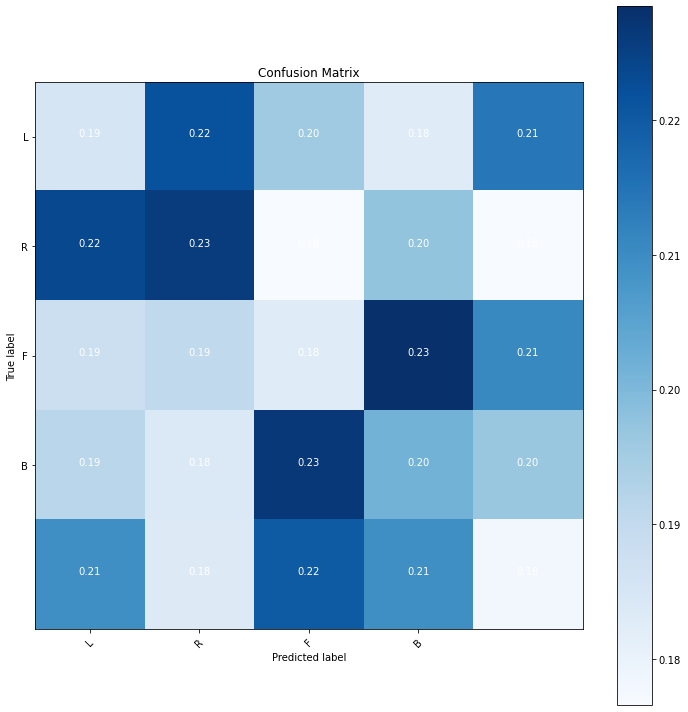

In [9]:
import itertools
from sklearn.metrics import confusion_matrix
import numpy as np


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

   
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    
predictions = model.predict(x=validationGen, verbose=0)
cm = confusion_matrix(y_true=validationGen.classes, y_pred=np.argmax(predictions, axis=-1))    
validationGen.class_indices

cm_plot_labels = ['N', 'L','R','F','B']
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix', normalize=True)


In [10]:
testGenerator = ImageDataGenerator(
    rescale=1./255
)

testGen = imageGenerator.flow_from_directory(
    os.path.join(rootPath, 'test_set'),
    color_mode="grayscale",
    target_size=(64, 64)
)

#model.evaluate_generator(testGen)

Found 995 images belonging to 5 classes.


예측: Front


IndexError: list index out of range

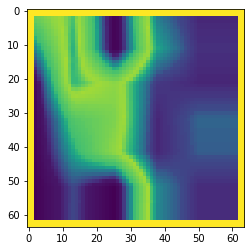

In [11]:
from tensorflow.keras.preprocessing.image import array_to_img
import numpy as np

cls_index = ['Normal','Back', 'Front', 'Left', 'Right']

imgs = testGen.next()
arr = imgs[0][0]
img = array_to_img(arr).resize((64, 64))
plt.imshow(img)
result = model.predict_classes(arr.reshape(1, 64, 64, 1))
print('예측: {}'.format(cls_index[result[0]]))
print('정답: {}'.format(cls_index[np.argmax(imgs[1][0])])) 

In [ ]:
from tensorflow.keras.preprocessing.image import array_to_img
import numpy as np
from tqdm.notebook import tqdm

cls_index = ['Normal','Back', 'Front', 'Left', 'Right']

correct_count = 0
total_count = 0

for i in tqdm(range(len(testGen.labels))):
    imgs = testGen.next()
    arr = imgs[0][0]
    img = array_to_img(arr).resize((64, 64))
#     plt.imshow(img)
    result = model.predict_classes(arr.reshape(1, 64, 64, 1))
#     print('예측: {}'.format(cls_index[result[0]]))
#     print('정답: {}'.format(cls_index[np.argmax(imgs[1][0])])) 
    
    total_count += 1
    if cls_index[result[0]] == cls_index[np.argmax(imgs[1][0])]:
        correct_count += 1

print('전체횟수:{0}, 정답횟수:{1}, 정답률:{2}'.format(total_count, correct_count, correct_count/total_count))
plt.imshow(img)
print('예측: {}'.format(cls_index[result[0]]))
print('정답: {}'.format(cls_index[np.argmax(imgs[1][0])])) 